# CS170A -- HW#2: Eigenfaces -- Python

Your name:  ______________________

Your UID:  ________

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor \,H\,/\,24\, \rfloor}$ points are
deducted.

## Problem 1:  Eigenfaces

Chapter 11 of the Course Reader is on Eigenfaces.
For this assignment we have included the face files
for this chapter in the directory <tt>old_faces</tt>.
It includes some Matlab scripts and a database of 177 face images,
each a grayscale <tt>.bmp</tt> bitmap file of size $64 \times 64$ pixels.
The face images have been pre-processed so that the background
and hair are removed and the faces have similar lighting conditions.

The Course Reader explains how to
reshape each face image into a $1 \times 64^2 \, = \, 1 \times 4096$ row vector, and collect them into a matrix.
The principal components of the matrix then define the main dimensions of variance in the faces.
The program <tt>more_efficient_eigenfaces.m</tt> shows how to do this.
These principal components are called <i>eigenfaces</i>.

### This Assignment uses a new Face Dataset -- with Normal and Smiling Faces

The goal of this problem is to apply the same ideas to a new set of 200 faces in the directory <tt>new_faces</tt>.
The subdirectory <tt>new_faces/faces</tt> has 200 faces that have been normalized, cropped, and equalized.
The subdirectory <tt>new_faces/smiling_faces</tt> has 200 images of the same people, but they are smiling.
Each of these images is a grayscale <tt>.jpg</tt> file with size $193 \times 162$.

### 1a:  The Average Face

Modify the program <tt>more_efficient_eigenfaces.m</tt> (available in this directory)
to use the <tt>new_faces</tt> images instead of the <tt>old_faces</tt> images.
Also, modify it to use the Matlab function <tt>imresize</tt> to downsample
each of the new faces by a factor of 3, so it is $64 \times 54$ (instead of $193 \times 162$).
Then: <i>pad</i> both sides of the image with <tt>zeros(64,5)</tt>
so the result is a $64 \times 64$ image.

Then: create a function that
takes as input a string array of filenames of face images, an integer $k$,
and an integer sample size $s$ ---
and yields the average face and the first $k$ singular values and eigenfaces as output values
for a sample of size $s$.

Apply your function to
both the <tt>new_faces/faces</tt>
and the <tt>new_faces/smiling_faces</tt>
directories,
and plot the absolute value of the difference between your average face and (your downsampled version of)
the average face provided in the directory.

(The <tt>imagesc</tt> function can display images with automatic rescaling of numeric values.)

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy 
from scipy.misc import imresize
import matplotlib.cm as cm
import matplotlib.ticker as MT
plt.style.use('ggplot')

#libs

In [34]:
NewFace = glob.glob("new_faces/faces/*.jpg");
NewFace.remove('new_faces/faces/averagefaceimage_seta.jpg')

SmileFace = glob.glob("new_faces/smiling_faces/*.jpg");
SmileFace.remove('new_faces/smiling_faces/averagefaceimage_setb.jpg')

numfiles = len(NewFace)
snumfiles = len(SmileFace)

rp=np.random.permutation(NewFace);
rps=np.random.permutation(snumfiles);

samplesize=200;

sample = NewF[0:samplesize];
face=plt.imread(rp[0])
[row, col] = np.pad(imresize(face,1/3),((0,0),(5,5)),'constant',constant_values=0).shape

image_vector = lambda Bitmap: np.double(np.reshape(Bitmap, np.dot(row, col)))

a = np.random.randn(6, 9) + 1j*np.random.randn(6, 9)
U, S, V = svds( np.cov(a.T), 3)
U,S,V
a,b=more_efficient_pca(a,3)

In [28]:
def svds(A,k):
    U,sigma,VT = np.linalg.svd(A, full_matrices=False)
    n, p = A.shape
    if k > min(n,p):  k = min(n,p)
    S = np.diag(sigma[:k])
    return (U[:,:k], S, VT.T[:,:k])

def more_efficient_pca( F, k ):
    (n,p) = F.shape;
    

    Fbar = np.kron( np.ones((n,1)), np.mean(F,axis=0) );

    Y = (F-Fbar) / np.sqrt(n-1);

    U_k,  S_k , V_k = svds( Y, k );   #  k cannot be larger than n or p

    PrincipalComponents = V_k;
    SingularValues = np.power(np.diag(S_k),2);
    return (PrincipalComponents, SingularValues )

In [29]:

def svds(A,k):
    U,sigma,VT = np.linalg.svd(A, full_matrices=False)
    n, p = A.shape
    if k > min(n,p):  k = min(n,p)
    S = np.diag(sigma[:k])
    return (U[:,:k], S, VT.T[:,:k])

def Average_Face(filestring,s,k):
    F = np.zeros((s,row*col));
    for i in range(s):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        Face_resize=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        # figure
        # imshow(Face_Matrix)
        # title(Image_File)
        F[i,:] = image_vector(Face_resize);  # the i-th row of F is the i-th image
    fbar = sum(F,1)/s;
    #plt.figure
    #plt.imshow((np.uint8(fbar).reshape(row,col)),cmap='Greys_r')
    #plt.title('The Average Face')
    #plt.xlabel('(average of our sample)')
    #plt.show()
    for i in range(s):
        F[i,:] = F[i,:] - fbar;
    U, singular_values = more_efficient_pca( F, k );
    #U, S, V = svds( np.cov(F.T), k);
    #singular_values = np.diag(S);
    #U=(F.T).dot(U)
    return(np.uint8(fbar).reshape(row,col),singular_values,U)



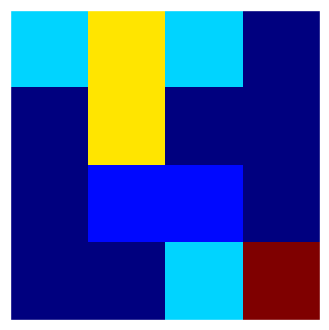

scaldimage is a similar function as imagesc in matlab


In [30]:
def scaledimage(img, pixwidth=1, ax=None, grayscale=False):
  
    (N, M) = img.shape # row and col
    # Need to create a new Axes?
    if(ax == None):
        ax = plt.figure().gca()
    # extents = Left Right Bottom Top
    exts = (0, pixwidth * M, 0, pixwidth * N)
    if(grayscale):
        ax.imshow(img,
                  interpolation='nearest',
                  cmap=cm.gray,
                  extent=exts)
    else:
        ax.imshow(img,
                  interpolation='nearest',
                  extent=exts)

    ax.xaxis.set_major_locator(MT.NullLocator())
    ax.yaxis.set_major_locator(MT.NullLocator())
    return ax

if __name__ == '__main__':
    # Define a synthetic test dataset
    testweights = np.array([[0.25, 0.50, 0.25, 0.00],
                            [0.00, 0.50, 0.00, 0.00],
                            [0.00, 0.10, 0.10, 0.00],
                            [0.00, 0.00, 0.25, 0.75]])
    # Display it
    ax = scaledimage(testweights)
    plt.show()

print('scaldimage is a similar function as imagesc in matlab')


In [31]:
def diff(f,fx):
    b=(np.pad(imresize(f,1/3),((0,0),(5,5)),'constant',constant_values=0));
    diff=abs(image_vector(b)-image_vector(fx));
    return np.uint8(diff).reshape(row,col)
    

In [32]:
f0,j,k=Average_Face(numfiles,200,60)
k.shape


TypeError: 'int' object is not subscriptable

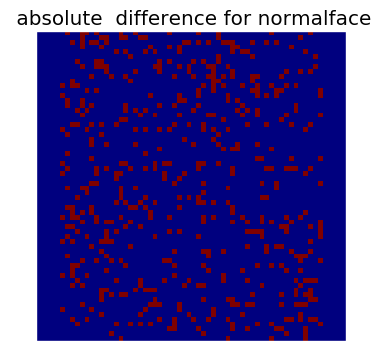

In [107]:
a=plt.imread("new_faces/faces/averagefaceimage_seta.jpg");
scaledimage(diff(a,f0))
plt.title(" absolute  difference for normalface" )
plt.show()

In [108]:
f1,m,n=Average_Face(SmileFace,200,60)
n.shape

(4096, 60)

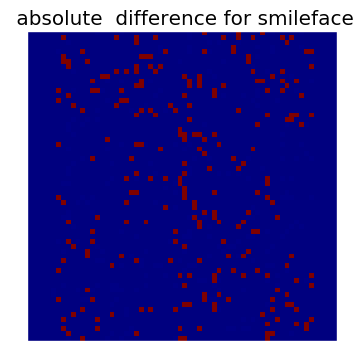

In [109]:
avg=plt.imread('new_faces/smiling_faces/averagefaceimage_setb.jpg');
R=(np.pad(imresize(avg,1/3),((0,0),(5,5)),'constant',constant_values=0));
scaledimage(abs(R-f1))
plt.title(" absolute  difference for smileface" )
plt.show()

### 1b: Smiling makes a Difference

If your mean normal face is $\overline{\mathbf{f}}_0$, and your mean smiling face is $\overline{\mathbf{f}}_1$,
render (using <tt>imagesc</tt>)
the difference $\overline{\mathbf{f}}_0-\overline{\mathbf{f}}_1$
(the average difference between normal faces and smiling faces).


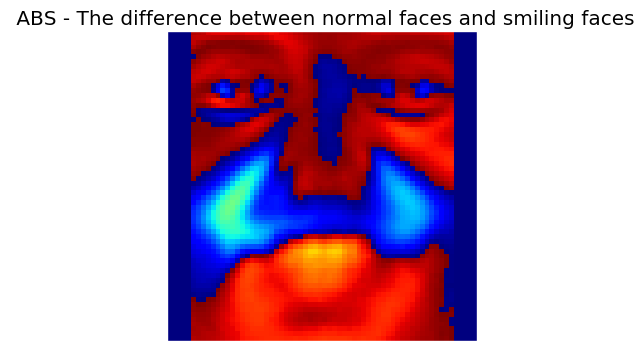

In [110]:
scaledimage(abs(f0-f1))
plt.title(" ABS - The difference between normal faces and smiling faces" )
plt.show()

### 1c: Scree Plots and $k$-Approximation

Using your downsampled images,
perform PCA on each set of faces (normal and smiling).

For each image (normal or smiling), construct its $64^2 \times 1$ vector $\mathbf{f}$.
Then, subtract the average face
($\overline{\mathbf{f}}_0$ or $\overline{\mathbf{f}}_1$)
and project the remainder on the first $k = 60$ eigenfaces.
For example, with a smiling face,
the projection of $\mathbf{f}$ on the $j$-th smiling eigenface $\mathbf{e}_j$ is
$$
c_j ~=~ {(\mathbf{f} \, - \, \overline{\mathbf{f}}_1)}' \, {\mathbf{e}_j}  ~~~~~~~~~~ (j = 1,\dots,k).
$$

For each set of faces (normal or smiling),
make one large scree plot for the set, showing all sequences of the first $k$ coefficients
for each image overplotted (e.g. with <tt>hold on</tt>).

In [111]:

def scree_plot(filestring):
    i,j,k=Average_Face(filestring,200,60);
    m=image_vector(i);
    e=np.zeros(60)
    for i in range(200):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        c=image_vector(face)-m;
        e=c.dot(k)
        plt.plot(e,'-')
    
   
       

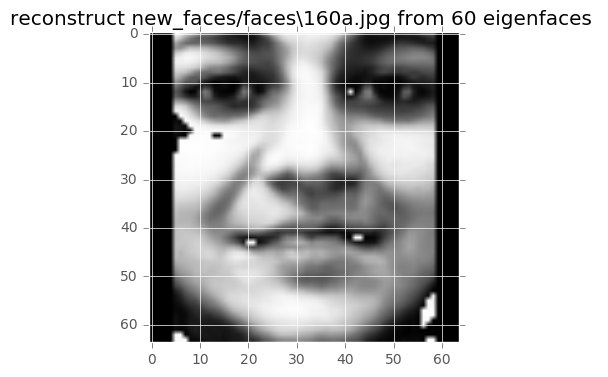

In [78]:
w=image_vector(f0);  
Face_Matrix = plt.imread('new_faces/faces/160a.jpg');
face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
c=image_vector(face)-w;
e=c.dot(k)
r_f=w+e.dot(k.T)
r=np.uint8(r_f).reshape(row,col)

plt.imshow(r,cmap='Greys_r')
plt.title("reconstruct new_faces/faces\\160a.jpg from 60 eigenfaces ")
plt.show()

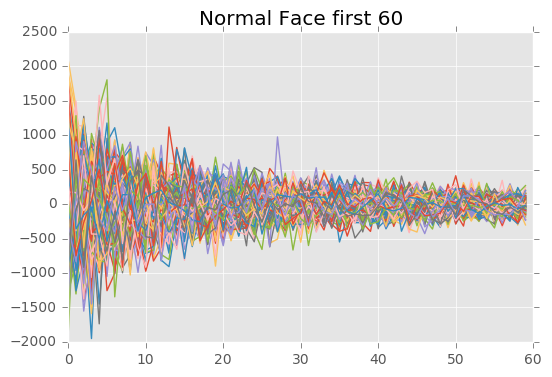

In [112]:
scree_plot(filenames)
plt.title("Normal Face first 60" )
plt.show()

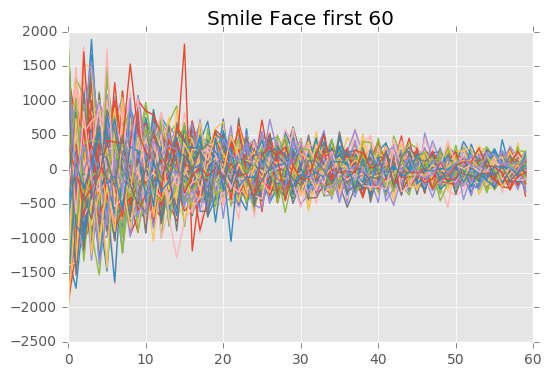

In [113]:
scree_plot(sfilenames)
plt.title("Smile Face first 60" )
plt.show()

### 1d:  Unusualness of a Face

Let us say the <i>unusualness</i> of a face is the $L_2$ norm
of its eigenface-coefficient vector (using the first $k=60$ eigenfaces).

Determine, for each set (normal or smiling), the most unusual face.

In [115]:
def findunusual(fileinput):
    
    i,u,w=Average_Face(fileinput,200,60);
    e=np.zeros(60)
    max=[0,0]
    ave=image_vector(i);
    for i in range(200):
            FileImg = fileinput[ssample[i]];
            Matrix = plt.imread(FileImg);
            face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
            c=image_vector(face)-ave;
            e=c.dot(k)
            a= np.linalg.norm(e)
            if a>max[0]:
                max[0]=a;
                max[1]=fileinput[ssample[i]];
    Matrix = plt.imread(max[1]);
    face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
    plt.imshow(face,cmap='Greys_r');
    return max;

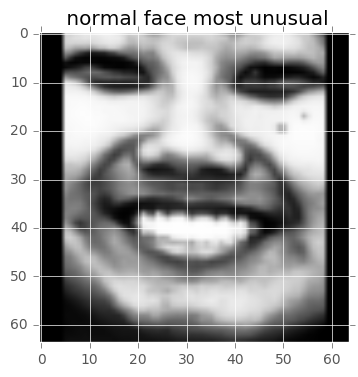

[4226.744570941667, 'new_faces/faces/38a.jpg']

In [116]:
#  the most unusual normal face
face1=findunusual(NewFace)
plt.title(" normal face most unusual")
plt.show();
face1

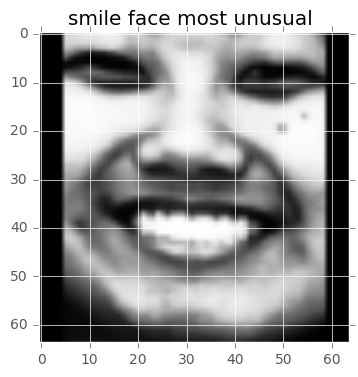

[3672.4654394098243, 'new_faces/smiling_faces/38b.jpg']

In [117]:
#  the most unusual smiling face
Face2=most_unusual(SmileFace)
plt.title("smile face most unusual ")
plt.show();
Face2

## Problem 2: Face Classifiers

Develop two different face classifiers using the eigenfaces you've computed;
each should be a function that, given a face image $\mathbf{f}$ as input,
yields the output value 1 if $\mathbf{f}$ is smiling, and 0 otherwise.
(NOTE: or vice-versa; we just need the function to be a classifier)

Specifically, implement the following 3 classifiers that take an input image $\mathbf{f}$:
<ul><li>  {Classifier X}:   yield 1 if the normal face unusualness of $\mathbf{f}$ is greater than smiling face unusualness of $\mathbf{f}$, else 0.
<br/><br/>
</li><li>  {Classifier Y}:   yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||^2$, else 0.
<br/><br/>
<!--
</li><li>  {Classifier Z}:   if $C_0$ is the covariance matrix for normal faces, and $C_1$ is the covariance matrix for smiling faces,
yield 1 if $||{\mathbf{f} - \overline{\mathbf{f}}_0}||_{C_0}^2 ~\geq ~ ||{\mathbf{f} - \overline{\mathbf{f}}_1}||_{C_1}^2$, else 0.
<br/>
(Here: $||{\mathbf{x}}||_C^2 \;=\; {\mathbf{x}}' \; C^{-} \; \mathbf{x}$ is the kernel norm defined by the pseudo-inverse of the covariance matrix $C$.)
-->
</li></ul>

### 2a:  Unusual Face Classification

Using each of these classifiers, determine the classification it yields
for the two most unusual images you found in the previous question.

In [90]:
#  X, Y, Z classifications of the most unusual normal face
def classifier_X(f,f0,f1):
    #f0,j,k=Average_Face(filenames,200,200)
    #f1,m,n=Average_Face(sfilenames,200,200)
    face=np.pad(imresize(f,1/3),((0,0),(5,5)),'constant',constant_values=0);
    ave=image_vector(f0);
    save=image_vector(f1);
    c=image_vector(face)-ave;
    d=image_vector(face)-save;
    e=c.dot(k)
    g=d.dot(n)
    a= np.linalg.norm(e)
    b= np.linalg.norm(g)
    if a>b:
        return 1
    else:
        return 0
    

In [91]:
Face_Matrix = plt.imread('new_faces/faces/30a.jpg');
classifier_X(Face_Matrix,f0,f1)

1

In [92]:
Face_Matrix = plt.imread('new_faces/smiling_faces/162b.jpg');
classifier_X(Face_Matrix,f0,f1)

0

In [25]:
#  X, Y, Z classifications of the most unusual smiling face
def classifier_Y(f,f0,f1):
    face=np.pad(imresize(f,1/3),((0,0),(5,5)),'constant',constant_values=0);
    ave=image_vector(f0);
    save=image_vector(f1);
    c=image_vector(face)-ave;
    d=image_vector(face)-save;
    a= np.linalg.norm(c)**2
    b= np.linalg.norm(d)**2
    if a>=b:
        return 1
    else:
        return 0

In [27]:
Face_Matrix = plt.imread('new_faces/faces/30a.jpg');
classifier_Y(Face_Matrix,f0,f1)

1

In [28]:
Face_Matrix = plt.imread('new_faces/smiling_faces/162b.jpg');
classifier_Y(Face_Matrix,f0,f1)

1

### 2b:  Splitting into Training and Test sets

Write a function <tt>[Sublist1 Sublist2] = randsplit(List)</tt> that takes an array <tt>List</tt> of length <tt>n</tt>
and splits it randomly into two sublists of size <tt>floor(n/2)</tt> and <tt>ceil(n/2)</tt>.
(Hint: <tt>randperm</tt>)

Use <tt>randsplit</tt> to split each of the 200-face sets
into a <u>training subset</u> and <u>testing subset</u> of equal size.

For both sets of faces (100 normal faces and 100 smiling faces),
compute the average normal and smiling faces
$\overline{\mathbf{f}}_0$ and $\overline{\mathbf{f}}_1$
<u>for the training set</u>.

In [29]:
import math
def randsplit(l):
    n=len(l);
    perm=np.random.permutation(n);
    sub1=[];sub2=[];
    for i in range(int(math.floor(n/2))):
        sub1.append( l[perm[i]]);
    for i in range(int(math.ceil(n/2))):
        sub2.append( l[perm[i+int(np.floor(n/2))]]);
    return (sub1, sub2);

In [30]:
# The average normal face (for the training set)
train_set,test_set=randsplit(filenames);
F = np.zeros((100,row*col));
for i in range(100):
    Image_File = train_set[i];
    Face_Matrix = plt.imread(Image_File);
    Face_resize=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
    # figure
    # imshow(Face_Matrix)
    # title(Image_File)
    F[i,:] = image_vector(Face_resize);  # the i-th row of F is the i-th image
f_0 = sum(F,1)/100;

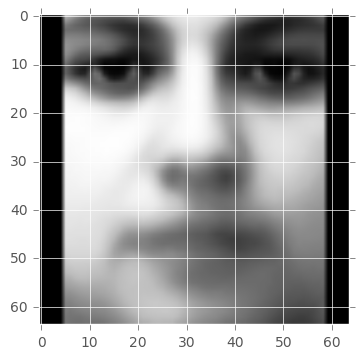

In [31]:
r=np.uint8(f_0).reshape(row,col)

plt.imshow(r,cmap='Greys_r')
plt.show()

In [32]:
# The average smiling face (for the training set)
strain_set,stest_set=randsplit(sfilenames);
F = np.zeros((100,row*col));
for i in range(100):
    Image_File = strain_set[i];
    Face_Matrix = plt.imread(Image_File);
    Face_resize=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
    F[i,:] = image_vector(Face_resize);  # the i-th row of F is the i-th image
f_1 = sum(F,1)/100;

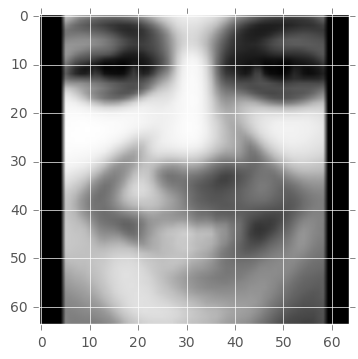

In [33]:
r=np.uint8(f_1).reshape(row,col)

plt.imshow(r,cmap='Greys_r')
plt.show()

### 2c:  Classifier Error Rate

For each of the Classifiers (X, Y), using the average faces you just computed: 
<ul><li>
classify each of the 200 faces $\mathbf{f}$ in the testing set, and count classification errors.
</li><li>
compute the <i>error rate</i> (percentage of errors in test face classifications) for the Classifier.
</li></ul>

Then rank the classifiers by their error rate.

#### For normal faces (using the test set):

In [34]:
def error(jil):
    e_0=0;
    if jil==1:
        for i in range(100):
            Image_File = test_set[i];
            Face_Matrix = plt.imread(Image_File);
            if classifier_X(Face_Matrix,f_0,f_1)==1:
                e_0=e_0+1;
    else:
        for i in range(100):
            Image_File = test_set[i];
            Face_Matrix = plt.imread(Image_File);
            if classifier_Y(Face_Matrix,f_0,f_1)==1:
                e_0=e_0+1;
    return e_0;

In [35]:
# X, Y error rates
e1=error(1);e2=error(2);
print('error rate for X classifier: {}% , Y classifier {}% .'.format(e1  ,e2) )

error rate for X classifier: 9% , Y classifier 5% .


In [36]:
#  which of the classifiers has lowest error rate for normal faces in the test set?
# Y classifier wins in the test

#### For smiling faces (using the test set):

In [37]:
def serror(jil):
    e_0=0;
    if jil==1:
        for i in range(100):
            Image_File = stest_set[i];
            Face_Matrix = plt.imread(Image_File);
            if classifier_X(Face_Matrix,f_0,f_1)==0:
                e_0=e_0+1;
    else:
        for i in range(100):
            Image_File = stest_set[i];
            Face_Matrix = plt.imread(Image_File);
            if classifier_Y(Face_Matrix,f_0,f_1)==0:
                e_0=e_0+1;
    return e_0;

In [38]:
# X, Y error rates
 
print('error rate for X classifier: {}% , Y classifier {}% .'.format(serror(1)  ,serror(2) ) )

error rate for X classifier: 21% , Y classifier 10% .


In [39]:
#  which of the classifiers has lowest error rate for smiling faces in the test set?
# Y classifier wins in the smilling face test

## Problem 3:  Face Compression

In the previous problem you computed the first 60 Eigenface coefficients, and used these to find the most unusual face.

For each $64 \times 64$ image $X$ from your (downsampled) smiling faces, compute the following sequences:
<ul><li> (descendingly sorted absolute values of) the first 60 Eigenface coefficients for $X$
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided FFT of $X$  (in Matlab: <tt>fft2(X)</tt>)
</li><li> (descendingly sorted absolute values of) the first 60 coefficient values from the two-sided DCT of $X$  (in Matlab: <tt>dct2(X)</tt>)
</li><li> the first 60 singular values from the SVD of $X$.
</li></ul>

We get an <i>image compression</i> scheme if we keep only the first $k \leq 60$ coefficients, and discard the rest.

Define
$$
\mbox{$k$-coefficient compression error} ~~=~~
\frac{\mbox{(the sum of absolute values of all coefficients after the first $k$)}}{\mbox{(the sum of absolute values of all coefficients)}} .
$$

Compute the $k$-coefficient compression error for each of the 4 transforms,
$1 \leq k \leq 60$, <u>for the smiling test set</u>.

Rank the 4 transforms above by their average compression error (for $k \leq 60$).

In [40]:
def eigerror(filestring):
    i,u,w=Average_Face(filestring,200,60);
    x,y,z=Average_Face(filestring,200,200);
    m=image_vector(i);
    e=np.zeros((60,200))
    f=np.zeros((200,200))
    for i in range(200):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        c=image_vector(face)-m;
        e[:,i]=np.sort(abs(c.dot(w)))[::-1]
        f[:,i]=np.sort(abs(c.dot(z)))[::-1]
    return e,f;

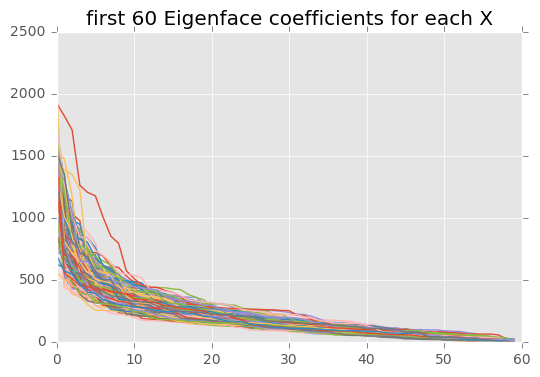

In [41]:
e,f=eigerror(sfilenames);
for i in range(200):
    plt.plot(e[:,i])
plt.title("first 60 Eigenface coefficients for each X" )
plt.show()

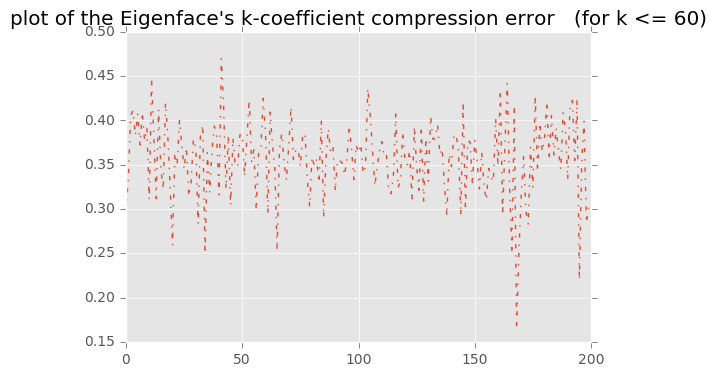

In [42]:
#  plot of the Eigenface's k-coefficient compression error   (for k <= 60)

all=np.sum(abs(f),axis=0); error= all - np.sum(abs(e),axis=0) ; error= error/all;eigerror=np.mean(error);
plt.plot(error,'-.');
plt.title("plot of the Eigenface's k-coefficient compression error   (for k <= 60)" )
plt.show()

In [43]:
print("average 60-coefficient compression error for Eigenface's k-coefficient compression :  {}% .".format(eigerror*100) )

average 60-coefficient compression error for Eigenface's k-coefficient compression :  35.76049617840491% .


In [44]:
#  plot of the two-sided FFT's k-coefficient compression error  (for k <= 60)

###   You might do something like this:
#   TwoSidedFFTofX = fft2(X);
#   SortedAbsoluteValuesOfFourierCoefficients = sort(abs(TwoSidedFFTofX(:)), 'descend');
#   figure
#   plot( SortedAbsoluteValuesOfFourierCoefficients(1:60) )
def ffterror(filestring):
    e=np.zeros((4096,200))
    for i in range(200):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        c=np.fft.fft2(face);
        b=c.reshape((row*col));
        b=np.sort(abs(b))[::-1];
        e[:,i]=b;
    return e;

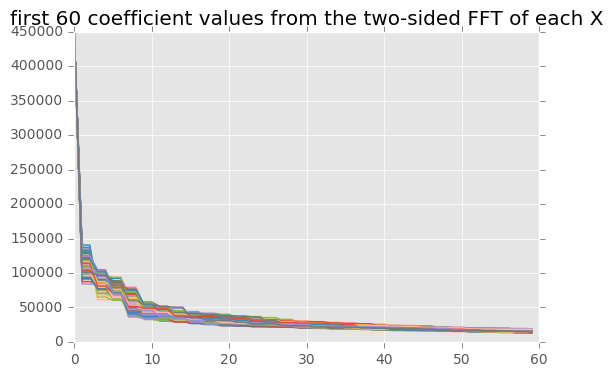

In [45]:
e=ffterror(sfilenames);
for i in range(200):
    plt.plot(e[0:60,i])
plt.title("first 60 coefficient values from the two-sided FFT of each X" )
plt.show()

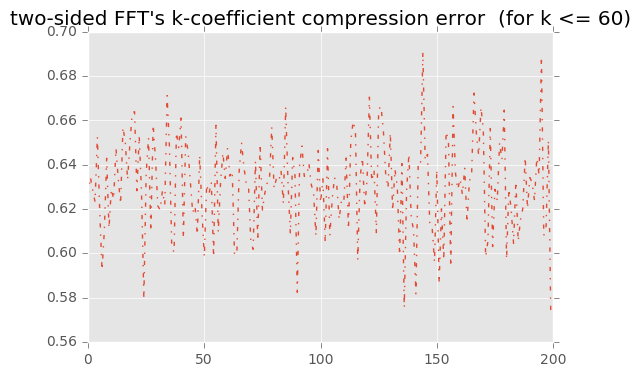

In [46]:

all=np.sum(abs(e),axis=0); error= all - np.sum(abs(e[0:60,:]),axis=0) ; error= error/all; ffterror=np.mean(error)
plt.plot(error,'-.');
plt.title("two-sided FFT's k-coefficient compression error  (for k <= 60)" )
plt.show()



In [47]:
print('average 60-coefficient compression error for two-sided FFT compression :  {}% .'.format(ffterror*100) )

average 60-coefficient compression error for two-sided FFT compression :  63.07646005883962% .


In [48]:
Face_Matrix = plt.imread('new_faces/faces/162a.jpg');
face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
a=np.fft.fft2(face);
b=a.reshape((row*col));
b=np.sort(abs(b))[::-1];


FileNotFoundError: [Errno 2] No such file or directory: 'new_faces/faces\\162a.jpg'

In [49]:
#  plot of the two-sided DCT's k-coefficient compression error  (for k <= 60)
from scipy.fftpack import dct

def dcterror(filestring):
    e=np.zeros((4096,200))
    for i in range(200):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        c=dct(dct(face, axis=0), axis=1);
        b=c.reshape((row*col));
        b=np.sort(abs(b))[::-1];
        e[:,i]=b;
    return e;

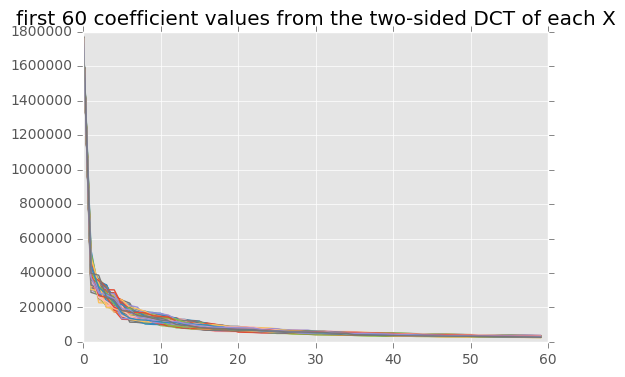

In [50]:
e=dcterror(sfilenames);
for i in range(200):
    plt.plot(e[0:60,i])
plt.title("first 60 coefficient values from the two-sided DCT of each X" )
plt.show()

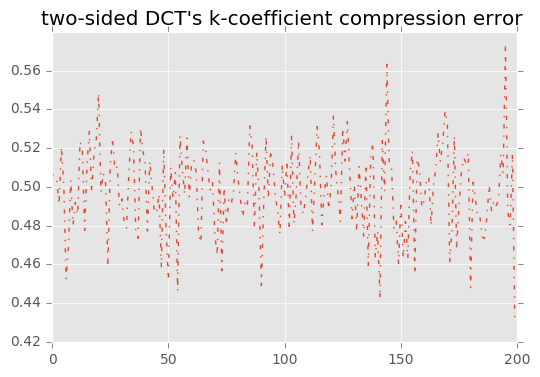

In [51]:
all=np.sum(abs(e),axis=0); error= all - np.sum(abs(e[0:60,:]),axis=0) ; error= error/all; dcterror=np.mean(error)
plt.plot(error,'-.');
plt.title("two-sided DCT's k-coefficient compression error " )
plt.show()


In [52]:
print('average 60-coefficient compression error for two-sided DCT compression :  {}% .'.format(dcterror*100) )

average 60-coefficient compression error for two-sided DCT compression :  49.83113721066326% .


In [53]:
#  plot of the rank-k singular value compression error (for k <= 60)
def rankerror(filestring):
    e=np.zeros((64,200))
    for i in range(200):
        Image_File = filestring[sample[i]];
        Face_Matrix = plt.imread(Image_File);
        face=np.pad(imresize(Face_Matrix,1/3),((0,0),(5,5)),'constant',constant_values=0);
        U,sigma,VT = np.linalg.svd(face, full_matrices=False)
        e[:,i]=sigma;
    return e;

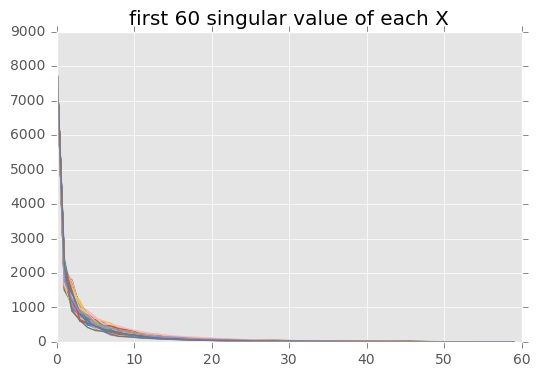

In [54]:
e=rankerror(sfilenames);
for i in range(200):
    plt.plot(e[0:60,i])
plt.title("first 60 singular value of each X" )
plt.show()

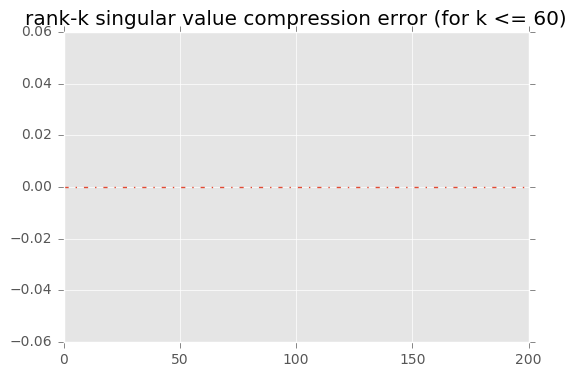

In [55]:
all=np.sum(abs(e),axis=0); error= all - np.sum(abs(e[0:60,:]),axis=0) ; error= error/all; rankerror=np.mean(error)
plt.plot(error,'-.');
plt.title("rank-k singular value compression error (for k <= 60)" )
plt.show()

In [56]:
print('average 60-coefficient compression error for rank-k singular value compression :  {}% .'.format(rankerror*100) )

average 60-coefficient compression error for rank-k singular value compression :  0.0% .


In [57]:
e.shape

(64, 200)

In [58]:
#  which of the 4 compression schemes has lowest average compression error?
# conclusion
print("average 60-coefficient compression error for Eigenface's k-coefficient compression :{}% , two-sided FFT compression :  {}% ,two-sided DCT compression :  {}%, rank-k singular value compression :  {}% .".format(eigerror*100, ffterror*100,dcterror*100,rankerror*100) )

#rank-k singular value compression :  0.0% .< compression error for Eigenface's k-coefficient compression :35.76107618272144% , < two-sided DCT compression :  49.83113721066326%, <two-sided FFT compression :  63.076460058839615% ,
print("rank-k singular value compression :  0.0% .< compression error for Eigenface's k-coefficient compression :35.76107618272144% , < two-sided DCT compression :  49.83113721066326%, <two-sided FFT compression :  63.076460058839615% ,")

average 60-coefficient compression error for Eigenface's k-coefficient compression :35.76049617840491% , two-sided FFT compression :  63.07646005883962% ,two-sided DCT compression :  49.83113721066326%, rank-k singular value compression :  0.0% .
rank-k singular value compression :  0.0% .< compression error for Eigenface's k-coefficient compression :35.76107618272144% , < two-sided DCT compression :  49.83113721066326%, <two-sided FFT compression :  63.076460058839615% ,
